In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

Task 1

In [8]:
N = 15 #number of jumps
T = np.random.exponential(1, size = N) #times_between_jumps
S = np.cumsum(T) #moments_of_jumps
jumps = np.arange(0, N)
starts = np.hstack(([0], S[:-1]))

Text(0, 0.5, 'N(t)')

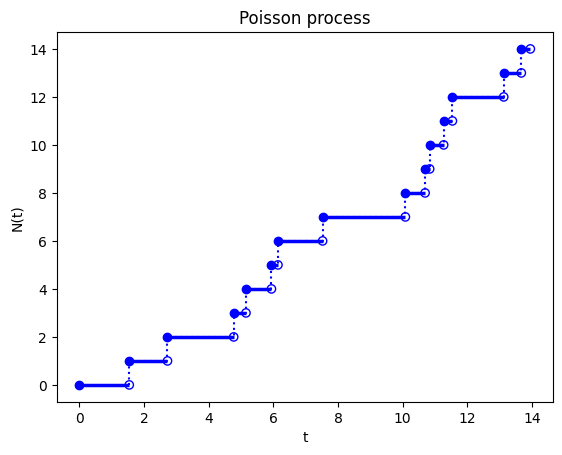

In [9]:
plt.plot(S, jumps, linestyle=':', drawstyle='steps', color = 'b')
plt.scatter(starts, jumps, color = 'b')
plt.scatter(S, jumps, facecolors='none', edgecolors='b')
# plt.plot(range(5), range(5)[::-1], linestyle=':', drawstyle='steps')
plt.hlines(jumps, starts, S, lw = 2.5, color = 'b')
plt.title('Poisson process')
plt.xlabel('t')
plt.ylabel('N(t)')

In [65]:
def number_of_jumps(lamb, t):
    time = 0
    N = 0
    while time < t:
        T = np.random.exponential(1/lamb)
        time += T
        N += 1
    return N-1

In [67]:
size = 100000
board = np.zeros(size)
lamb = 1.5
t = 10
for i in range(size):
    n = number_of_jumps(lamb, t)
    board[i] = n

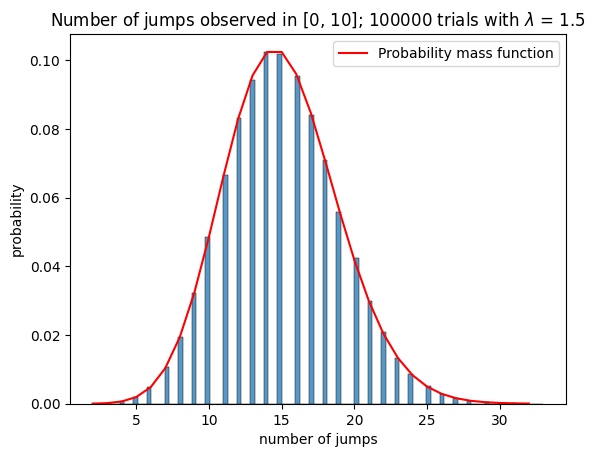

In [71]:
sns.histplot(board, bins=100,  stat="probability")
plt.xlabel("number of jumps")
plt.ylabel("probability")
plt.title(f"Number of jumps observed in [0, {t}]; {size} trials with $\lambda$ = {lamb}")
ns = np.arange(min(board), max(board))
plt.plot(ns, ((lamb*t)**ns*np.exp(-lamb*t))/[math.factorial(int(n)) for n in ns], 'r', label = 'Probability mass function')
plt.legend()